# T4 Wrangling spike-trains

## Toy example of a light sensitive neuron

Let us consider a neuron, which is alive, that is capable of sending spikes. This particular neuron will generally not send any spikes in the dark, and this neuron will send spikes if you shine green light (e.g. at wavelength 550 nm) on it. Let's also assume that we have a recording electrode near the soma (the point where this neuron sends spikes). Through this electrode, we can record when this neuron is firing over time. 
The result of this recording is a list of `0`s for when no spike was emitted and `1`s for when a spike was emitted. This array is saved in the variable `spikeTrain`.

**Note** : The array `recordingTime` contains the binned time of the recording. Each bin has a duration of 10 ms intervals and the number in each bin specifies whether the neuron fired or not during the specific time period. 

In [1]:
import numpy as np

recordingTime = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
spikeTrain = np.array([0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0])

This neuron is spiking when illuminated with green light. So let's indicate the time points during which the green light in on in bold : [10,20,30,40,**50,60,70,80,90,100,110,120,130,**140,150,160,170,180,190,200]. This means that the light started at 50 ms and lasted until 130 ms. It stayed on for 80 ms. 

#### Basic questions about the spike train

First, we will extract some basic information about the spike train. 

* How many spikes did the neuron fire in total during the recording period? 
* How long is the recording period? 
* What is the average firing rate of the neuron during the recording period? 
* At which time points do the spikes occur?

In [2]:
print('The total number of spikes is :',np.sum(spikeTrain))
print('The length of the recording is :',recordingTime[-1], 'ms')
# note that ms have to be converted in seconds for calculating the rate
print('The average firing rate is :', np.sum(spikeTrain)*1000./recordingTime[-1] , 'spikes/s') 

# obtain spike-times with numpy where function
spikeTimes = recordingTime[np.where(spikeTrain==1)[0]]

print('The spike-times are : ',spikeTimes)
# alternative solution with for loop
for n in np.arange(len(spikeTrain)):
    if spikeTrain[n]==1:
        print('The neuron fired at spikes at ',recordingTime[n],'ms')



The total number of spikes is : 4
The length of the recording is : 200 ms
The average firing rate is : 20.0 spikes/s
The spike-times are :  [ 90 110 130 170]
The neuron fired at spikes at  90 ms
The neuron fired at spikes at  110 ms
The neuron fired at spikes at  130 ms
The neuron fired at spikes at  170 ms


#### Response latency

The time it takes the neuron to be reponsive, i.e., for a neuron to spike in response to a stimulus - in our case green light - is known as the **response latency**. 

* Calculate the latency to first spike after stimulus onset for the given spike-train. 

In [3]:
# we look at the first spike during the stimulus presentation
# we substract the stimulus onset - at 50 ms - to get the response latency
print('the response latency is :',spikeTimes[0]-50,'ms')

the response latency is : 40 ms


<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Calculate the inter-spike-intervals (ISIs) for the recording. Remember that the ISIs are the intervals between all spikes. Once you have the intervals, calculate the coefficient (CV) of variation (see lecture L02 for details). The CV quantifies the irregularity of the spike train. 

One can also calculate the firing rate of the neuron based on the ISIs. Try to think of a way to get from the ISIs to the firing rate. 
</div>

In [4]:
isis = np.diff(spikeTimes)

CV = np.std(isis)/np.mean(isis)

print('The CV of the spike train is : ',CV)

firingRateISI = 1000./np.mean(isis)

print('The firing rate based on the ISIs is ', firingRateISI, ' spk/s')

The CV of the spike train is :  0.3535533905932737
The firing rate based on the ISIs is  37.5  spk/s


#### Raster plot

Let't make a plot and illustrate the spike-train. The plot the spiking activity we need to know the time of every spike in the array. People sometimes called these the *spike timestamps*, or *spiketimes*. To plot the spikes, we will use the common visualization method of a **spike raster plot**. In such a plot, each spike is represented as a vertical line, at the time when it occurred, with time on the x-axis.

* Plot the raster plot of the spiketrain using the `matplotlib.pyplot` `eventplot()` function. This function takes the x-locations as input argument. 
* Mark the stimulus period with as green shaded region in the plot by making use of the `matplotlib.pyplot` `axvspan()` function (input arguments are the x start and stop values). 

(0.0, 200.0)

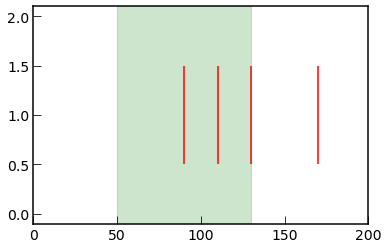

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.eventplot(spikeTimes,color='red')
plt.axvspan(50,130,color='green',alpha=0.2)
plt.xlim(0,200)

#### Multiple recordings of the same neuron

What if there is some mechanism inside the neuron that causes it to spike highly unreliably? What if we are recording the signals of this neuron in a noisy environment? To address this, we would need to stimulate and record the neuron multiple times (ideally many times). 

Below are the spike-trains of the neuron from ten identical recordings, i.e., the green light simulus was on always during the [50,130] ms time window.

In [6]:
tenSpikeTrains = np.array([[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0],\
                  [0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],\
                  [0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],\
                  [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],\
                  [1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0],\
                  [0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]])

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Calculate and concatenate all inter-spike-intervals (ISIs) for all recordings. Again, calculate the CV and firing rate based on all ISIs. 

Compare the firing rate based on the ISIs with the firing when considering the total length of all recordings and the number of spikes measured. What could explain the difference between the two?  

</div>

In [7]:
allISIs = [] # create an empty list
for i in range(len(tenSpikeTrains)):
    spikeTimes = recordingTime[np.where(tenSpikeTrains[i]==1)[0]]
    isi = np.diff(spikeTimes)
    allISIs.extend(isi)
print(allISIs)

globalCV = np.std(allISIs)/np.mean(allISIs)

print('The CV based on all recordings is ', globalCV)

globalFiringRateISI = 1000./np.mean(allISIs)

print('The firing rate based on all recordings calculated using the ISIs is', globalFiringRateISI, ' spk/s.')

totalNumberOfSpikes = np.sum(tenSpikeTrains)
totalDuration = recordingTime[-1]*len(tenSpikeTrains)

firingRate = totalNumberOfSpikes*1000./totalDuration

print('The firing rate base on all recordings calculatd using the total number of spikes and total duration is ', firingRate, ' spk/s')

[20, 20, 40, 10, 40, 40, 90, 30, 60, 10, 20, 70, 30, 10, 40, 40, 10, 10, 30, 10, 30, 10, 100, 10, 50, 10, 30, 10, 30, 10, 30, 20, 60, 10]
The CV based on all recordings is  0.7519697998468136
The firing rate based on all recordings calculated using the ISIs is 32.69230769230769  spk/s.
The firing rate base on all recordings calculatd using the total number of spikes and total duration is  22.0  spk/s


The ISI based firing rate is higher since the period before the stimulus [0,50] ms is not taken into account. It's not taken into account since no spikes occur in most of the recordings. The ISI based calculation emphasizes the higher firing rate during the stimulus presentation. While the total duration based firing rate accounts for the length of the recording. 

#### Visualize the recordings in a raster plot

In order to make a raster plot of the data from **all** the trials, let's use a similar method we used for the data from a single trial, except that we cycle through each array in the array. 

* Plot a raster-plot of all the data using a `for` loop and the `eventplot()` visualization function. Use the input argument `lineoffsets=[value]` to vertically displace individual spike-trains. 
* Indicate the stimulus period in the plot. 

(0.0, 200.0)

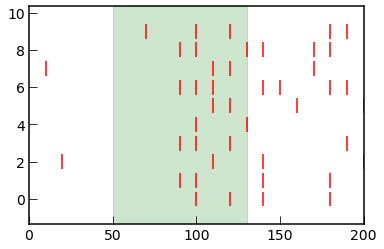

In [8]:
timesOfSpikesForTenRecordings = []
for i in range(len(tenSpikeTrains)):
    spikeTimes = recordingTime[np.where(tenSpikeTrains[i]==1)[0]]
    timesOfSpikesForTenRecordings.append(spikeTimes)
plt.eventplot(timesOfSpikesForTenRecordings,linelengths=0.8,color='red')
plt.axvspan(50,130,color='green',alpha=0.2)
plt.xlim(0,200)

## Coefficient of variation

Calculate the inter-spike-intervals (ISIs) for the first recording (`spikeTrain`). Remember that the ISIs are the intervals between all spikes. Once you have the intervals, calculate the coefficient (CV) of variation (see lecture L04 for details). The CV quantifies the irregularity of the spike train.

In [9]:
ISIs = np.diff(spikeTimes)

CV = np.std(ISIs)/np.mean(ISIs)

print('The CV of the spike train is : ',CV)

The CV of the spike train is :  0.6236095644623236


Now let's use the 10 recordings to compute a better estimate, i.e., an quantification based on more data-points, for the CV. 

In [10]:
tenISIs = []

for i in range(len(tenSpikeTrains)):
    spikeTimes = recordingTime[np.where(tenSpikeTrains[i]==1)[0]]
    ISIs = np.diff(spikeTimes)
    tenISIs.extend(ISIs)

CV = np.std(tenISIs)/np.mean(tenISIs)

print('The CV computed across all 10 spike trains is : ',CV)

The CV computed across all 10 spike trains is :  0.7519697998468136


The fact that the value of the coefficient of variation is eleveated and close to one means that the activity of our neuron is irregular. 

## The end